# Análise e Exploração dos dados de Wine Quality

<p>

O Wine Quality Dataset é um conjunto de dados popular usado para explorar a relação entre as propriedades químicas do vinho e a sua qualidade. Ele contém informações sobre vinhos tintos e brancos, cada um com 11 características químicas, como acidez, teor alcoólico, açúcar residual e pH. A variável alvo é uma classificação da qualidade do vinho, variando de 0 a 10, sendo uma avaliação numérica subjetiva dada por especialistas.

</p>
<p>
OBJETIVO: Classificar qual é a qualidade de cada vinha.
</p>

<p>
Descrição das colunas:


*   Fixed Acidity(Acidez Fixa):
  A maioria dos ácidos envolvidos no vinho são fixos ou não voláteis (não evaporam facilmente).
*   Volatile Acidity(Acidez Volátil):
  A quantidade de ácido acético no vinho, que em níveis muito altos pode levar a um gosto desagradável de vinagre.
*   Citric Acid(Ácido Cítrico):
  Encontrado em pequenas quantidades, o ácido cítrico pode adicionar "frescor" e sabor aos vinhos.
*   Residual Sugar(Açúcar Residual):
  A quantidade de açúcar restante após a fermentação parar, é raro encontrar vinhos com menos de 1 grama/litro e vinhos com mais de 45 gramas/litro são considerados doces.
*   Chlrides(Cloretos):
  A quantidade de sal no vinho.
*   Free Sulfur Dioxide(Dióxido de Enxofre Livre):
  A forma livre de SO2 existe em equilíbrio entre o SO2 molecular (como um gás dissolvido) e o íon bissulfito; previne o crescimento microbiano e a oxidação do vinho.
*   Total Sufur Dioxide(Dióxido de Enxofre Total):
  Quantidade de formas livres e ligadas de S02; em baixas concentrações, o SO2 é quase indetectável no vinho, mas em concentrações de SO2 livre acima de 50 ppm, o SO2 se torna evidente no nariz e no sabor do vinho.
*   Density(Densidade):
  A densidade da água é próxima à da água, dependendo do percentual de álcool e açúcar.
*   pH:
  Descreve o quão ácido ou básico um vinho é em uma escala de 0 (muito ácido) a 14 (muito básico); a maioria dos vinhos está entre 3-4 na escala de pH.
*   Sulphates(Sulfatos):
  Um aditivo de vinho que pode contribuir para os níveis de gás dióxido de enxofre (S02), que atua como um antimicrobiano e antioxidante.
</p>

In [1]:
!pip install kaggle
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

Dataset URL: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
License(s): DbCL-1.0
red-wine-quality-cortez-et-al-2009.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    log_loss,
    precision_score,
    recall_score,
    f1_score,
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler



In [3]:
!unzip red-wine-quality-cortez-et-al-2009.zip
df_wine = pd.read_csv("winequality-red.csv", delimiter=",")
df_wine.head()

Archive:  red-wine-quality-cortez-et-al-2009.zip
replace winequality-red.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: winequality-red.csv     


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df_wine.rename(columns={
    'fixed acidity': 'acidez_fixa',
    'volatile acidity': 'acidez_volatil',
    'citric acid': 'acido_citrico',
    'residual sugar': 'acucar_residual',
    'chlorides': 'cloretos',
    'free sulfur dioxide': 'dioxido_enxofre_livre',
    'total sulfur dioxide': 'dioxido_enxofre_total',
    'density': 'densidade',
    'sulphates': 'sulfatos',
    'alcohol': 'alcool',
    'quality': 'qualidade'
}, inplace=True)
df_wine.head()

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


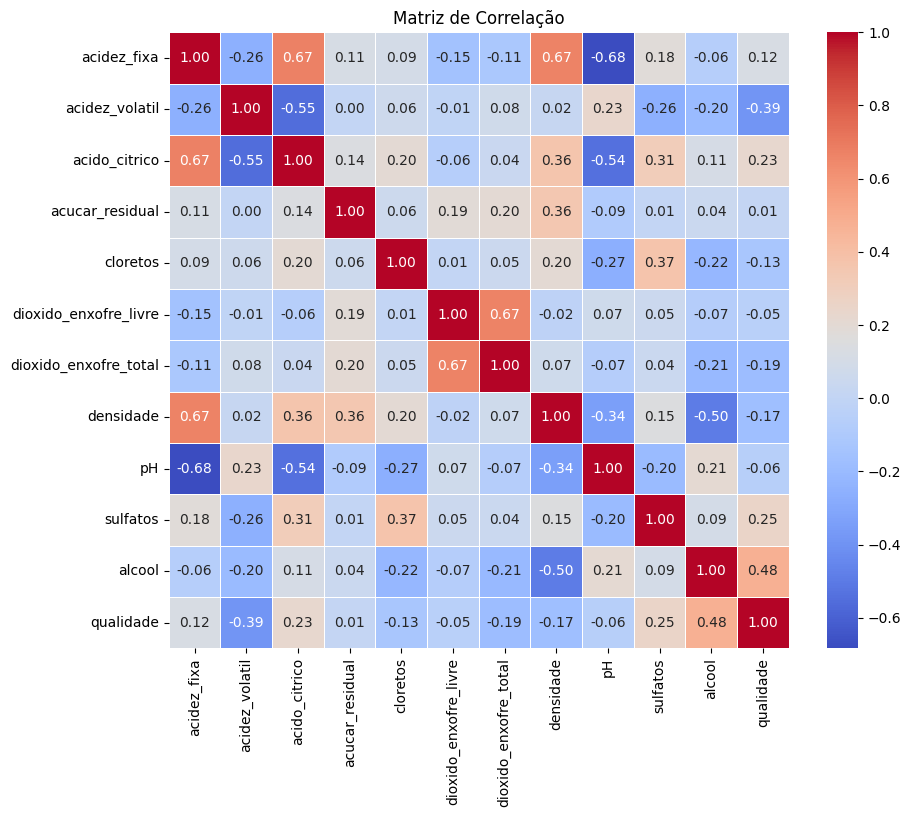

In [7]:
matrix_correlacao = df_wine.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

##### Análise da Correlação
<p>

O gráfico de correlação nos mostra como está a relação entre as variáveis, e vemos muitas variáveis com correlação próxima de 0, o que demonstra que elas não têm correlação significativa, como Sulfatos e Açúcar Residual, que têm correlação de 0,01. Apesar disso, temos outras variáveis que apresentam correlações interessantes de se analisar.

A Acidez Fixa tem uma relação significativa com pH, Densidade e Ácido Cítrico. Então, quanto maior a Acidez Fixa, maior a Densidade do vinho. A relação entre Acidez Fixa e pH é negativa; isso mostra que quanto mais ácido um vinho for, menor será seu pH e sua densidade também.

O Álcool apresenta uma relação negativa bem evidente com a densidade, então vinhos mais densos têm um menor teor alcoólico.

Além disso, vemos que a Qualidade do vinho tem uma relação considerável com a quantidade de Álcool, e fiz uma pesquisa rápida sobre isso. Isso acontece porque vinhos com mais álcool são considerados mais "encorpados", dando a falsa ideia de que vinhos com maior teor alcoólico são melhores, mas isso não é uma verdade.

</p>

## Visualização

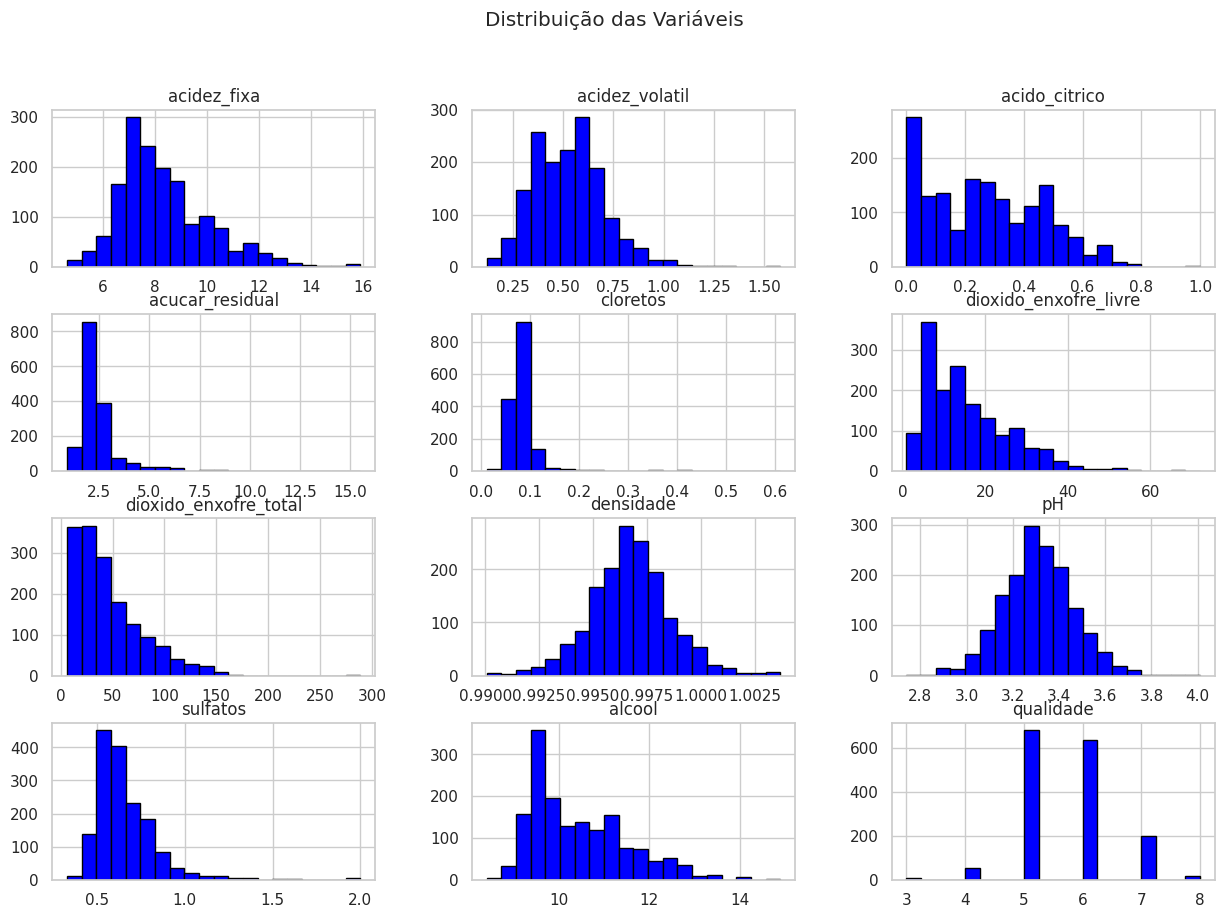

In [8]:
# Histogramas para cada variável
sns.set(style="whitegrid")
df_wine.hist(bins=20, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Distribuição das Variáveis')
plt.show()

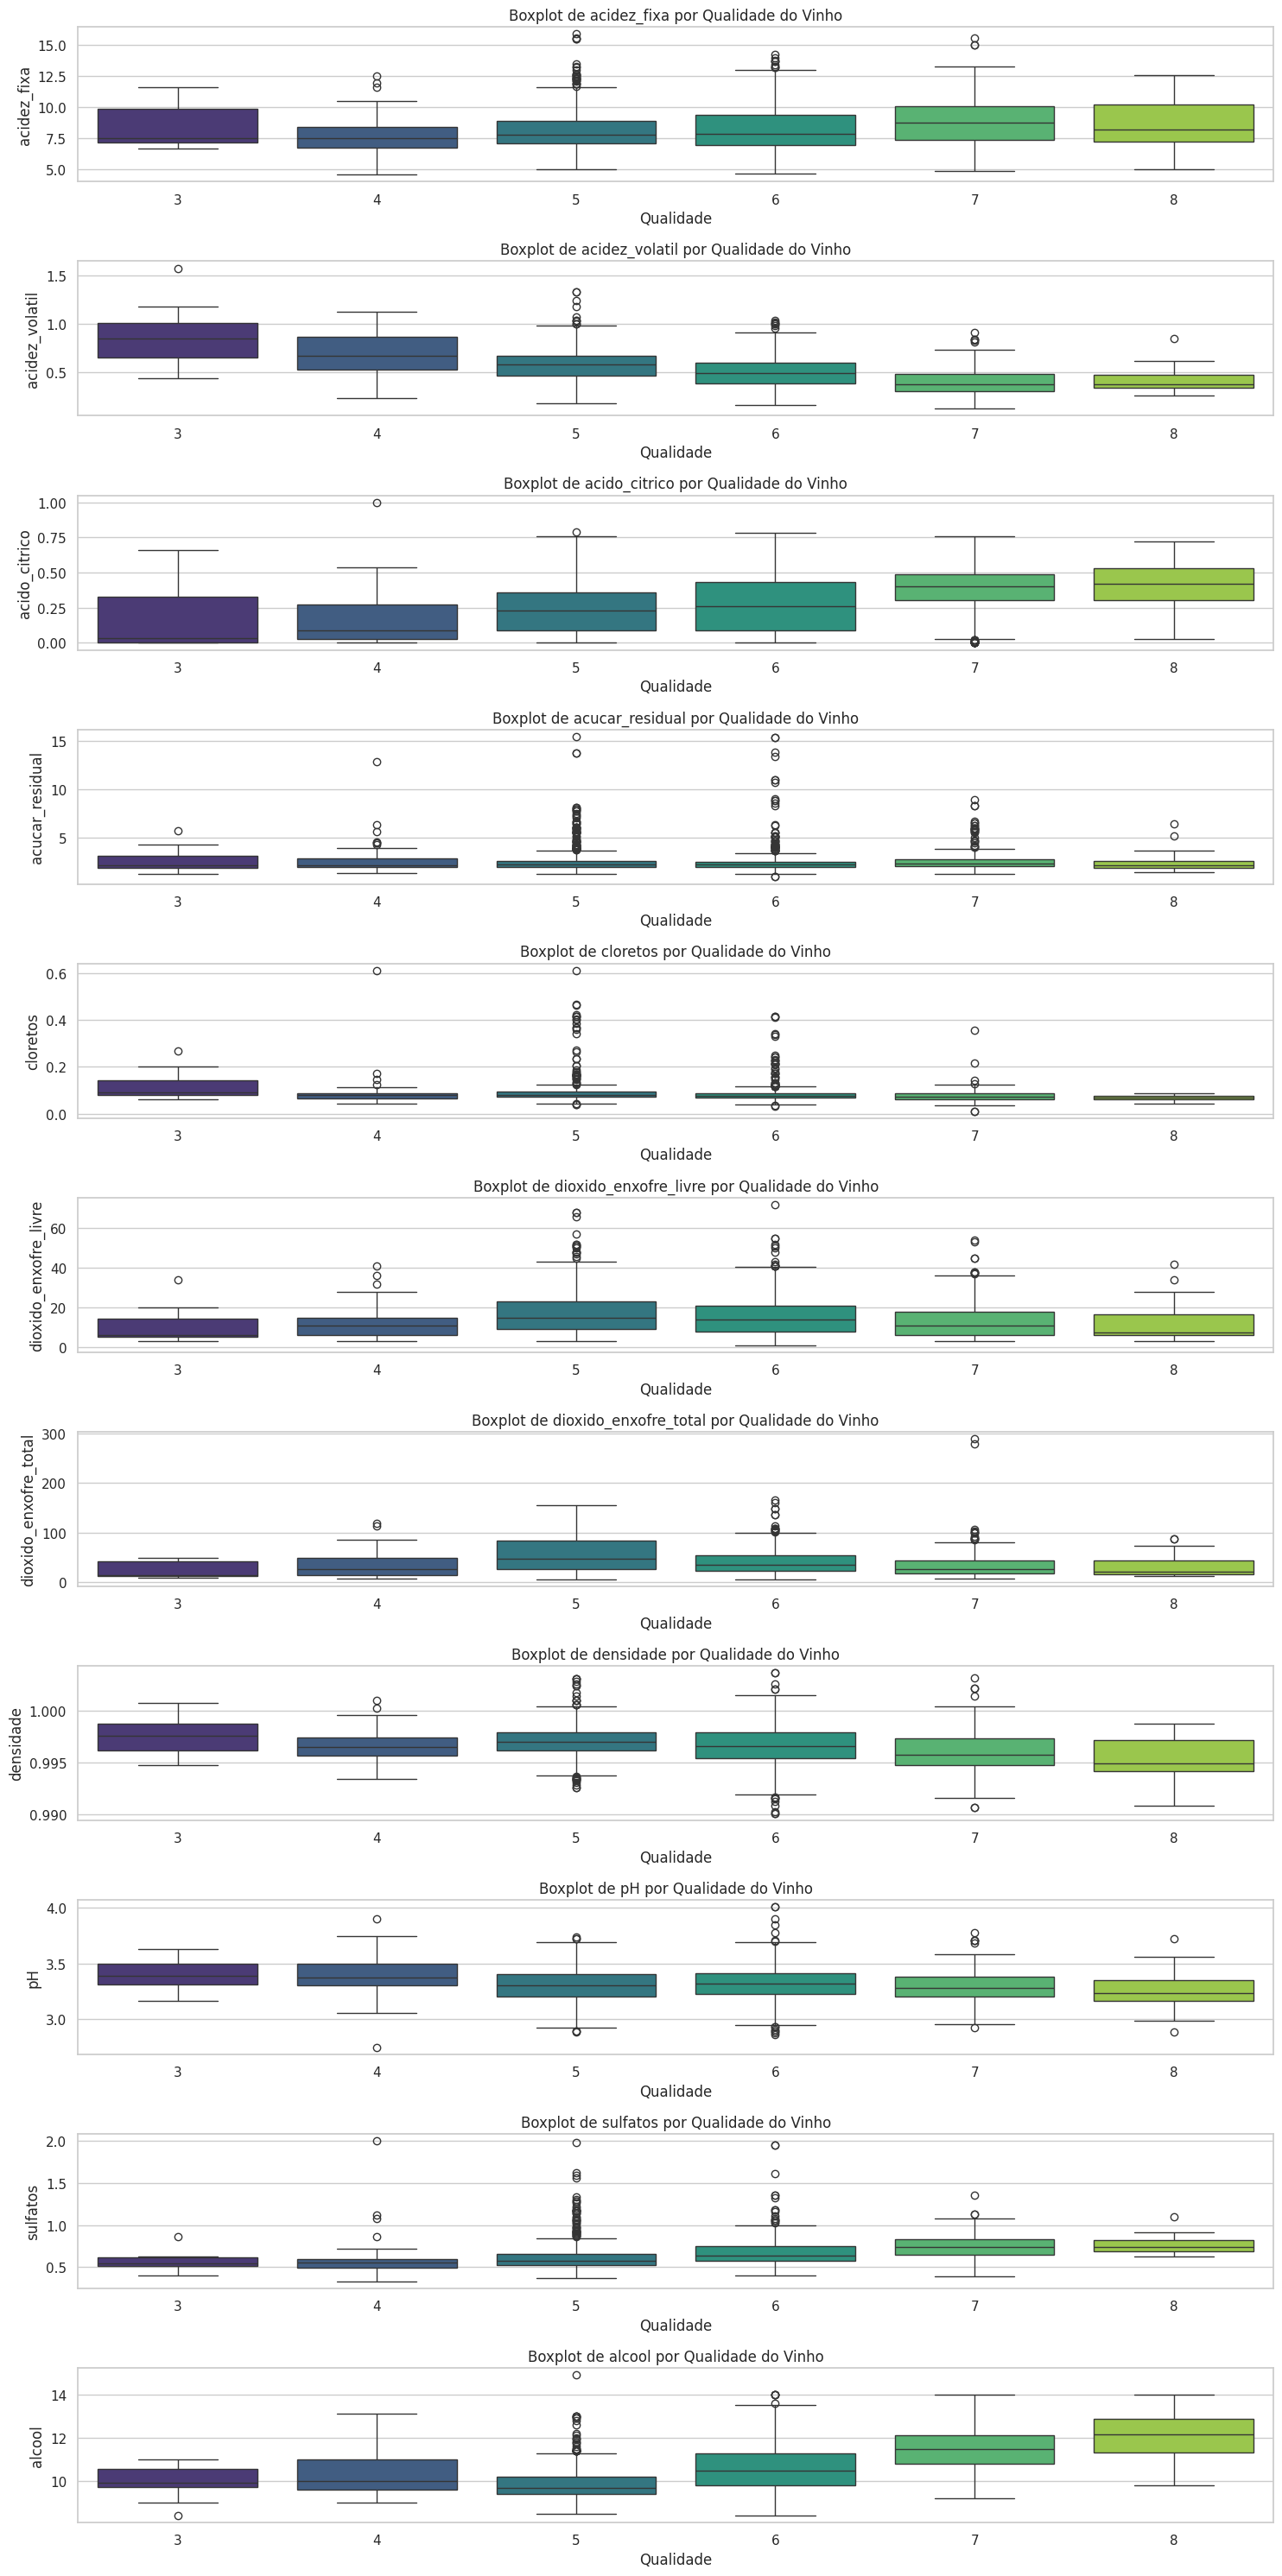

In [9]:
sns.set(style="whitegrid")

variables = df_wine.columns[:-1]

plt.figure(figsize=(15, 30))

for i, var in enumerate(variables):
    plt.subplot(len(variables), 1, i + 1)
    sns.boxplot(x='qualidade', y=var, data=df_wine, palette='viridis')
    plt.title(f'Boxplot de {var} por Qualidade do Vinho')
    plt.xlabel('Qualidade')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

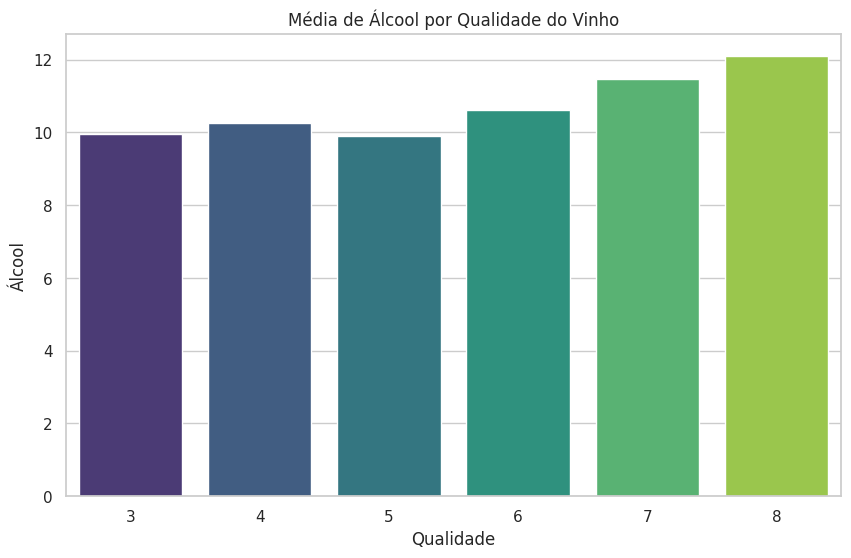

In [10]:
# Gráfico de barras da média de álcool por qualidade
media_alcool = df_wine.groupby('qualidade')['alcool'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='qualidade', y='alcool', data=media_alcool, palette='viridis')
plt.title('Média de Álcool por Qualidade do Vinho')
plt.xlabel('Qualidade')
plt.ylabel('Álcool')
plt.show()

# Modelos

In [11]:
X = df_wine.drop('qualidade', axis=1)
y = df_wine['qualidade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

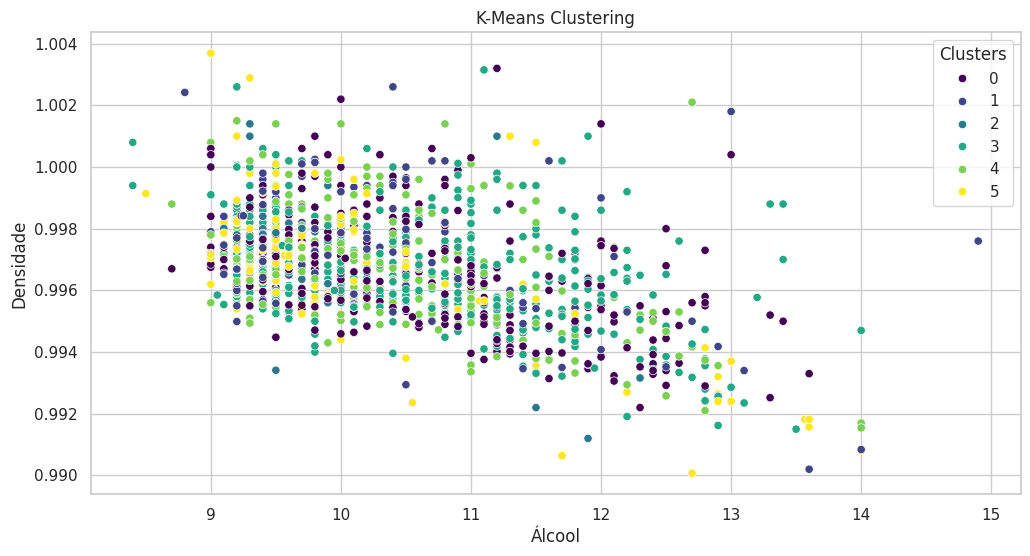

In [12]:
# K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)

df_wine['kmeans_labels'] = kmeans.labels_

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_wine['alcool'], y=df_wine['densidade'], hue=df_wine['kmeans_labels'], palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Álcool')
plt.ylabel('Densidade')
plt.legend(title='Clusters')
plt.show()

<p>
Mostra bem a relação de Alcool e Densidade, quanto mais alcoolico menor a densidade e existe o ponto fora do padrão onde ele é bem alcoolico e ainda sim sua densidade está alta. Quando vemos os que menor teor alcoolico vemos muitos pontos juntos de clusters diferentes e com uma densidade maior.
</p>

In [13]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

dt_predictions = dt_classifier.predict(X_test)

In [14]:
# XGBoost Classifier (Está com problemas nos rotulos então vou mudar para ver como ele se comporta)
df_xgboost = df_wine.copy()
df_xgboost['qualidade'] = df_wine['qualidade'].replace({3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5})

X_xgboost = df_xgboost.drop('qualidade', axis=1)
y_xgboost = df_xgboost['qualidade']

X_xgboost_train, X_xgboost_test, y_xgboost_train, y_xgboost_test = train_test_split(X_xgboost, y_xgboost, test_size=0.3, random_state=42, stratify=y)

xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_classifier.fit(X_xgboost_train, y_xgboost_train)

xgb_predictions = xgb_classifier.predict(X_xgboost_test)


In [15]:
# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

In [16]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [17]:
def avaliando_modelos(nome_modelo, y_pred, y_test):
    print(f"Modelo: {nome_modelo}")

    # Para modelos de classificação
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Precisao:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))
    print("------Fim------ ")


In [18]:
# Para SVM
avaliando_modelos('SVM', y_pred_svm, y_test)

# Para Random Forest
avaliando_modelos('Random Forest', y_pred_rf, y_test)

# Para XGBoost
avaliando_modelos('XGBoost', xgb_predictions, y_xgboost_test)

# Para Decision Tree
avaliando_modelos('Decision Tree', dt_predictions, y_test)

Modelo: SVM
Acurácia: 0.5729166666666666
Precisao: 0.47207826086956517
Recall: 0.5729166666666666
F1-Score: 0.5176159258408668
------Fim------ 
Modelo: Random Forest
Acurácia: 0.6583333333333333
Precisao: 0.6351359615486328
Recall: 0.6583333333333333
F1-Score: 0.6397796159377785
------Fim------ 
Modelo: XGBoost
Acurácia: 0.6354166666666666
Precisao: 0.621290580334698
Recall: 0.6354166666666666
F1-Score: 0.6231773945370115
------Fim------ 
Modelo: Decision Tree
Acurácia: 0.575
Precisao: 0.5767175917342205
Recall: 0.575
F1-Score: 0.5748454630110741
------Fim------ 


In [19]:
# Para KMeans
y_kmeans = kmeans.fit_predict(X)

# Cálculo das métricas
silhouette_avg = silhouette_score(X, y_kmeans)
calinski_harabasz_avg = calinski_harabasz_score(X, y_kmeans)
davies_bouldin_avg = davies_bouldin_score(X, y_kmeans)
inertia = kmeans.inertia_

print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Score: {calinski_harabasz_avg}')
print(f'Davies-Bouldin Score: {davies_bouldin_avg}')
print(f'Inertia: {inertia}')

Silhouette Score: 0.3990623804126296
Calinski-Harabasz Score: 2834.2972943230207
Davies-Bouldin Score: 0.8566558760457922
Inertia: 193420.48025912253


### Avaliação dos Modelos
<p>
Os modelos tiveram baixo desempenho, todos tiveram avaliações menores do que 70% e alguns estão proximos de 50%. Talvez isso esteja acontecendo pois as variaveis tem pouca relação umas com as outras e isso pode fazer com o que o modelo não entenda muito bem o que esta acontecendo ou até por ser um conjunto de dados que a Qualidade é uma avaliação muito pessoal e pode fazer com que cada avaliação de um componente de um vinho seja totalmente ignorada pois a pessoa que avaliou não se importava com alguma caracterista ruim, ou seja, gosto é gosto.
</p>
<p>
Vamos tentar trazer mais pesos as variaveis e talvez até criar alguma variavel a partir de outras.
</p>



# Feature Engeenier

In [20]:
df_wine.columns

Index(['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloretos', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade', 'kmeans_labels'],
      dtype='object')

In [21]:
df_wine.drop('kmeans_labels', axis=1, inplace=True)

In [22]:
df_wine_upgrade = df_wine.copy()
df_wine_upgrade['acid_fixa_pH'] = df_wine_upgrade['acidez_fixa'] * df_wine_upgrade['pH']
df_wine_upgrade['acid_fixa_div_densidade'] = df_wine_upgrade['acidez_fixa'] / df_wine_upgrade['densidade']
df_wine_upgrade['acidez_total'] = df_wine_upgrade['acidez_fixa'] + df_wine_upgrade['acidez_volatil']
df_wine_upgrade['interacao_acidez_alcool'] = df_wine_upgrade['acidez_fixa'] * df_wine_upgrade['alcool']
df_wine_upgrade['alcool_quadrado'] = df_wine_upgrade['alcool'] ** 2
df_wine_upgrade['ph_quadrado'] = df_wine_upgrade['pH'] ** 2
df_wine_upgrade['densidade_log'] = np.log(df_wine_upgrade['densidade'])
df_wine_upgrade['relacao_sulfatos'] = df_wine_upgrade['sulfatos'] / (df_wine_upgrade['dioxido_enxofre_total'] + 1)
df_wine_upgrade.head()


,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool,qualidade,acid_fixa_pH,acid_fixa_div_densidade,acidez_total,interacao_acidez_alcool,alcool_quadrado,ph_quadrado,densidade_log,relacao_sulfatos
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,25.974,7.416316,8.10,69.56,88.36,12.3201,-0.002202,0.016000
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,24.960,7.825040,8.68,76.44,96.04,10.2400,-0.003205,0.010000
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,25.428,7.823470,8.56,76.44,96.04,10.6276,-0.003005,0.011818
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,35.392,11.222445,11.48,109.76,96.04,9.9856,-0.002002,0.009508
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,25.974,7.416316,8.10,69.56,88.36,12.3201,-0.002202,0.016000


In [23]:
# df_wine_upgrade.drop('acidez_fixa', axis=1, inplace=True)
# df_wine_upgrade.drop('acidez_volatil', axis=1, inplace=True)
# df_wine_upgrade.drop('densidade', axis=1, inplace=True)
# df_wine_upgrade.drop('alcool', axis=1, inplace=True)
# df_wine_upgrade.drop('pH', axis=1, inplace=True)
# 'acidez_fixa', 'acidez_volatil', 'densidade', 'alcool', 'pH'
# 'qualidade_pH', 'qualidade_div_densidade'

In [24]:
scaler = StandardScaler()
df_wine_upgrade[['acido_citrico', 'acucar_residual', 'interacao_acidez_alcool', 'alcool_quadrado', 'ph_quadrado',
                 'densidade_log', 'relacao_sulfatos', 'cloretos', 'dioxido_enxofre_livre',
                 'dioxido_enxofre_total', 'sulfatos', 'acid_fixa_pH', 'interacao_acidez_alcool',
                 'acid_fixa_div_densidade', 'acidez_total']] = scaler.fit_transform(
    df_wine_upgrade[['acido_citrico', 'acucar_residual', 'interacao_acidez_alcool', 'alcool_quadrado', 'ph_quadrado',
                     'densidade_log', 'relacao_sulfatos', 'cloretos', 'dioxido_enxofre_livre',
                     'dioxido_enxofre_total', 'sulfatos', 'acid_fixa_pH', 'interacao_acidez_alcool',
                     'acid_fixa_div_densidade', 'acidez_total']]
)

In [25]:
df_wine_upgrade.head(10)

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool,qualidade,acid_fixa_pH,acid_fixa_div_densidade,acidez_total,interacao_acidez_alcool,alcool_quadrado,ph_quadrado,densidade_log,relacao_sulfatos
0,7.4,0.70,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.9978,3.51,-0.579207,9.4,5,-0.285718,-0.535374,-0.438774,-0.844988,-0.922026,1.297220,0.558960,-0.361359
1,7.8,0.88,-1.391472,0.043416,0.223875,0.872638,0.624363,0.9968,3.20,0.128950,9.8,5,-0.494180,-0.299652,-0.098301,-0.503841,-0.591340,-0.727336,0.029208,-0.758017
2,7.8,0.76,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.9970,3.26,-0.048089,9.8,5,-0.397967,-0.300557,-0.168744,-0.503841,-0.591340,-0.350086,0.135201,-0.637817
3,11.2,0.28,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.9980,3.16,-0.461180,9.8,6,1.650470,1.659716,1.545360,1.148343,-0.591340,-0.974943,0.664847,-0.790529
4,7.4,0.70,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.9978,3.51,-0.579207,9.4,5,-0.285718,-0.535374,-0.438774,-0.844988,-0.922026,1.297220,0.558960,-0.361359
5,7.4,0.66,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.9978,3.51,-0.579207,9.4,5,-0.285718,-0.535374,-0.462255,-0.844988,-0.922026,1.297220,0.558960,-0.516152
6,7.9,0.60,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,0.9964,3.30,-1.169337,9.4,5,-0.265982,-0.239960,-0.203965,-0.611937,-0.922026,-0.094693,-0.182842,-0.912272
7,7.3,0.65,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,0.9946,3.39,-1.110324,10.0,7,-0.537970,-0.579598,-0.526827,-0.674415,-0.420829,0.491330,-1.138120,-0.006772
8,7.8,0.58,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.9968,3.36,-0.520193,9.5,7,-0.237612,-0.299652,-0.274408,-0.619871,-0.840646,0.294237,0.029208,0.564174
9,7.5,0.50,0.457144,2.526589,-0.349975,0.107592,1.688677,0.9978,3.35,0.837107,10.5,5,-0.460259,-0.477574,-0.497476,-0.389299,0.020517,0.228928,0.558960,-0.905640


## Modelos Com Variaveis Melhoradas

In [26]:
X_upgrade = df_wine_upgrade.drop('qualidade', axis=1)
y_upgrade = df_wine_upgrade['qualidade']

X_upgrade_train, X_upgrade_test, y_upgrade_train, y_upgrade_test = train_test_split(X_upgrade, y_upgrade, test_size=0.3, random_state=42, stratify=y)

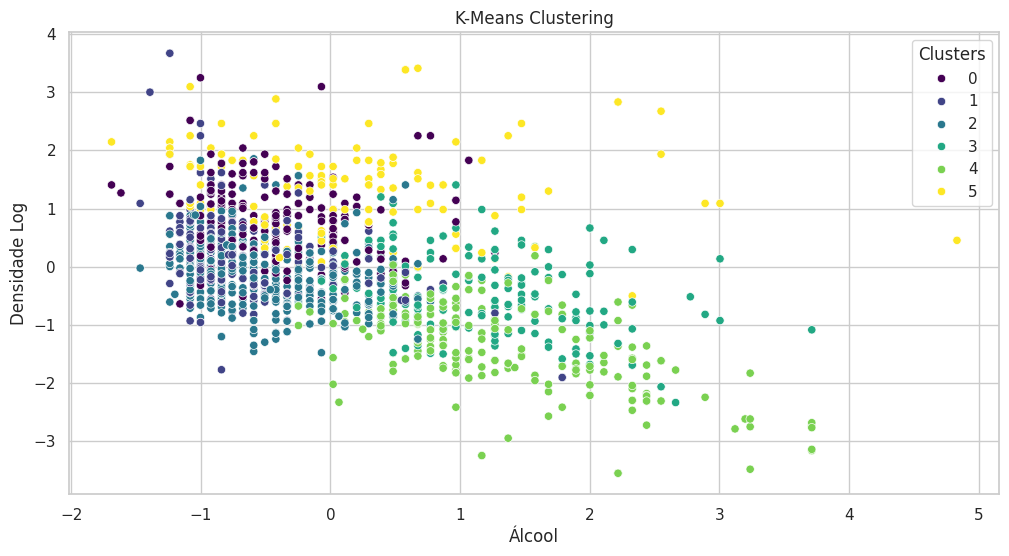

In [27]:
# K-Means
kmeans_upgrade = KMeans(n_clusters=6, random_state=42)
kmeans_upgrade.fit(X_upgrade)

df_wine_upgrade['kmeans_labels'] = kmeans_upgrade.labels_

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_wine_upgrade['alcool_quadrado'], y=df_wine_upgrade['densidade_log'], hue=df_wine_upgrade['kmeans_labels'], palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Álcool')
plt.ylabel('Densidade Log')
plt.legend(title='Clusters')
plt.show()

In [28]:
df_wine_upgrade.drop('kmeans_labels', axis=1, inplace=True)

In [29]:
# Decision Tree Classifier
dt_classifier_upgrade = DecisionTreeClassifier(random_state=42)
dt_classifier_upgrade.fit(X_upgrade_train, y_upgrade_train)

dt_predictions_upgrade = dt_classifier_upgrade.predict(X_upgrade_test)

In [30]:
# XGBoost Classifier (Está com problemas nos rotulos então vou mudar para ver como ele se comporta)
df_xgboost_upgrade = df_wine_upgrade.copy()
df_xgboost_upgrade['qualidade'] = df_wine_upgrade['qualidade'].replace({3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5})

X_xgboost_upgrade = df_xgboost_upgrade.drop('qualidade', axis=1)
y_xgboost_upgrade = df_xgboost_upgrade['qualidade']

X_xgboost_train_upgrade, X_xgboost_test_upgrade, y_xgboost_train_upgrade, y_xgboost_test_upgrade = train_test_split(X_xgboost_upgrade, y_xgboost_upgrade, test_size=0.3, random_state=42, stratify=y_xgboost_upgrade)

xgb_classifier_upgrade = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_classifier_upgrade.fit(X_xgboost_train_upgrade, y_xgboost_train_upgrade)

xgb_predictions_upgrade = xgb_classifier_upgrade.predict(X_xgboost_test_upgrade)


In [31]:
# SVM
svm_model_upgrade = SVC(kernel='linear')
svm_model_upgrade.fit(X_upgrade_train, y_upgrade_train)

y_pred_svm_upgrade = svm_model_upgrade.predict(X_upgrade_test)

In [32]:
# Random Forest
rf_model_upgrade = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_upgrade.fit(X_upgrade_train, y_upgrade_train)

y_pred_rf_upgrade = rf_model_upgrade.predict(X_upgrade_test)

In [33]:
# Para KMeans
y_kmeans_upgrade = kmeans_upgrade.fit_predict(X_upgrade)

# Cálculo das métricas
silhouette_avg_upgrade = silhouette_score(X_upgrade, y_kmeans_upgrade)
calinski_harabasz_avg_upgrade = calinski_harabasz_score(X_upgrade, y_kmeans_upgrade)
davies_bouldin_avg_upgrade = davies_bouldin_score(X_upgrade, y_kmeans_upgrade)
inertia_upgrade = kmeans_upgrade.inertia_

print(f'Silhouette Score Upgrade: {silhouette_avg_upgrade}')
print(f'Calinski-Harabasz Score Upgrade: {calinski_harabasz_avg_upgrade}')
print(f'Davies-Bouldin Score Upgrade: {davies_bouldin_avg_upgrade}')
print(f'Inertia Upgrade: {inertia_upgrade}')

Silhouette Score Upgrade: 0.17585265713804665
Calinski-Harabasz Score Upgrade: 363.8271873642135
Davies-Bouldin Score Upgrade: 1.5950389592202299
Inertia Upgrade: 13601.725558725004


In [34]:
# Para SVM
avaliando_modelos('SVM Upgrade', y_pred_svm_upgrade, y_upgrade_test)

# Para Random Forest
avaliando_modelos('Random Forest Upgrade', y_pred_rf_upgrade, y_upgrade_test)

# Para XGBoost
avaliando_modelos('XGBoost Upgrade', xgb_predictions_upgrade, y_xgboost_test)

# Para Decision Tree
avaliando_modelos('Decision Tree Upgrade', dt_predictions_upgrade, y_upgrade_test)

Modelo: SVM Upgrade
Acurácia: 0.5833333333333334
Precisao: 0.4895095047087549
Recall: 0.5833333333333334
F1-Score: 0.5305591184092286
------Fim------ 
Modelo: Random Forest Upgrade
Acurácia: 0.6625
Precisao: 0.6312577008995652
Recall: 0.6625
F1-Score: 0.641135554737359
------Fim------ 
Modelo: XGBoost Upgrade
Acurácia: 0.6583333333333333
Precisao: 0.6307368363233156
Recall: 0.6583333333333333
F1-Score: 0.6398180427829784
------Fim------ 
Modelo: Decision Tree Upgrade
Acurácia: 0.575
Precisao: 0.575231162012015
Recall: 0.575
F1-Score: 0.5739869505291605
------Fim------ 


# Avaliação dos Modelos com Feature Engineering

Após tentativas de aprimorar as variáveis para melhorar a performance dos modelos, observamos que os resultados não apresentaram avanços significativos. Os modelos ainda possuem uma acurácia relativamente baixa e pouca confiabilidade.

As melhorias implementadas nas variáveis foram:

* Criar uma variável correlacionada entre Acidez Fixa e pH para estabelecer uma relação mais forte;
* Criar uma variável correlacionada entre Acidez Fixa e Densidade para reforçar a relação entre esses atributos;
* Criar uma variável correlacionada entre Acidez Fixa e Álcool para acentuar sua relação;
* Criar uma variável correlacionada entre Sulfatos e Dióxido de Enxofre Total para intensificar essa relação;
* Criar uma variável somando Acidez Fixa e Acidez Volátil para unificar seus valores;
* Criar uma variável de Álcool ao quadrado para aumentar seu peso nos modelos;
* Criar uma variável de pH ao quadrado para dar mais relevância ao pH nos modelos;
* Criar uma variável de Densidade em escala logarítmica para obter valores mais manejáveis para essa característica.


<p>
Com essas variáveis criadas, apenas o modelo XGBoost apresentou uma leve melhora, com um ganho de cerca de 2%. Os outros modelos não tiveram melhorias superiores a 2%. Além disso, foram testadas versões do modelo tanto com as variáveis iniciais quanto sem elas — por exemplo, excluímos Álcool ao criar a variável "Álcool ao quadrado" — e, ainda assim, as métricas permaneceram próximas às do primeiro modelo ou até mesmo pioraram.

Podemos concluir, portanto, que a previsão da qualidade do vinho é complexa com os dados e variáveis disponíveis. Outra abordagem possível seria o uso de redes neurais, mas, como não é o foco deste estudo, assumiremos os resultados obtidos com os modelos atuais. Futuramente, poderemos retornar a essa análise e explorar essa outra técnica.
</p>

